In [44]:
# ================================================================
# 10. Student Exercise
# ================================================================
"""
TASK:
1. Download a dataset (e.g., Mall Customers, Vehicle Data).
2. Apply K-Means, DBSCAN, and GMM.
3. Compare using Silhouette Score.
4. Visualize clusters using PCA or t-SNE.
5. Discuss which algorithm works best and why.
"""

'\nTASK:\n1. Download a dataset (e.g., Mall Customers, Vehicle Data).\n2. Apply K-Means, DBSCAN, and GMM.\n3. Compare using Silhouette Score.\n4. Visualize clusters using PCA or t-SNE.\n5. Discuss which algorithm works best and why.\n'

In [45]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [46]:
df = pd.read_csv("datasets/E-commerce Customer Behavior - Sheet1.csv")
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [47]:
X = df.copy()
if "Customer ID" in X.columns:
    X = X.drop(columns=["Customer ID"])

X.head()


,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [48]:
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
numeric_cols

Index(['Age', 'Total Spend', 'Items Purchased', 'Average Rating',
       'Days Since Last Purchase'],
      dtype='object')

In [49]:
categorical_cols = X.select_dtypes(include=['object', "bool"]).columns
categorical_cols

Index(['Gender', 'City', 'Membership Type', 'Discount Applied',
       'Satisfaction Level'],
      dtype='object')

In [50]:
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

In [51]:
X_processed = preprocess.fit_transform(X)
X_dense = X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed

In [52]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_dense)

In [53]:
X_processed.shape

(350, 21)

In [54]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_processed)

In [55]:
kmeans_sil = silhouette_score(X_processed, kmeans_labels)
print('Silhouette Score for K-Means:', kmeans_sil)

Silhouette Score for K-Means: 0.5811038007260385


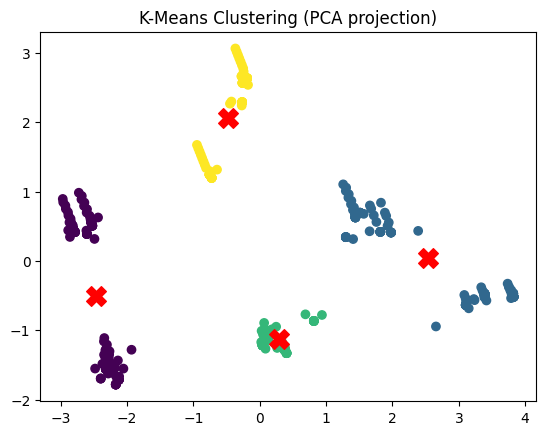

In [56]:
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200)
plt.title('K-Means Clustering (PCA projection)')
plt.show()

In [57]:
dbscan = DBSCAN(eps=1.2, min_samples=6)
db_labels = dbscan.fit_predict(X_processed)

In [58]:
dbscan_sil = silhouette_score(X_processed, db_labels)
n_noise = (db_labels == -1).sum()
print('Silhouette Score for DBSCAN:', dbscan_sil)

Silhouette Score for DBSCAN: 0.7890910681257256


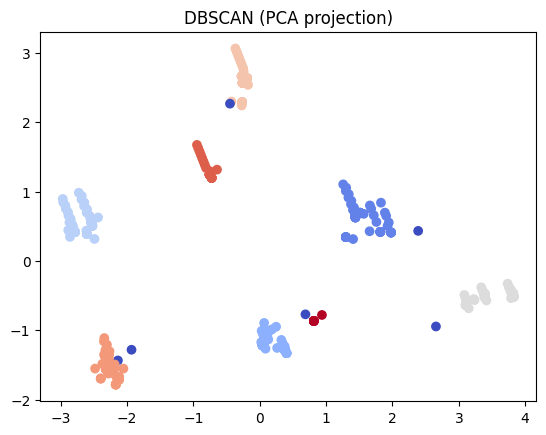

In [59]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='coolwarm')
plt.title('DBSCAN (PCA projection)')
plt.show()

In [60]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_processed)

In [61]:
gmm_sil = silhouette_score(X_processed, gmm_labels)
print('Silhouette Score for GMM:', gmm_sil)

Silhouette Score for GMM: 0.5811038007260385


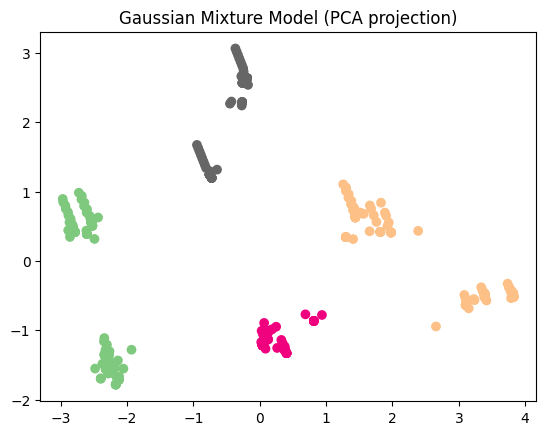

In [62]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='Accent')
plt.title('Gaussian Mixture Model (PCA projection)')
plt.show()

In [63]:
print("="*60)
print("CLUSTERING ALGORITHM COMPARISON (Based on Results)")
print("="*60)
print(f"\nSilhouette Scores:")
print(f"  K-Means: {kmeans_sil:.4f}")
print(f"  GMM:     {gmm_sil:.4f}")
print(f"  DBSCAN:  {dbscan_sil:.4f} (with {n_noise} noise points)")

best_algo = max([("K-Means", kmeans_sil), ("GMM", gmm_sil), ("DBSCAN", dbscan_sil)], key=lambda x: x[1])
print(f"\n✓ BEST: {best_algo[0]} (Score: {best_algo[1]:.4f})")
print(f"\nWhy: Highest silhouette score indicates better-defined,")
print(f"well-separated clusters. {best_algo[0]} works best for")
print(f"this customer behavior dataset.")
print("="*60)

CLUSTERING ALGORITHM COMPARISON (Based on Results)

Silhouette Scores:
  K-Means: 0.5811
  GMM:     0.5811
  DBSCAN:  0.7891 (with 6 noise points)

✓ BEST: DBSCAN (Score: 0.7891)

Why: Highest silhouette score indicates better-defined,
well-separated clusters. DBSCAN works best for
this customer behavior dataset.
